In [2]:
DATASET="rec_mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-006-000.root"

In [3]:
from mu2etools import wideband
from mu2etools import *

processor = wideband.DataProcessor(fixtimes=True)
ar = processor.getData(DATASET)

Processing file: rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-011-000.002132_003.root - 100.0% complete

In [4]:
list_febID = ar['febID'].to_list()
FEBID = min(list_febID, key=lambda x: len(x))

NFEBS=len(FEBID)
print("Dataset: %s"%DATASET)
print("Number of FEBs: %d"%NFEBS)
print("List of FEBs: %s"%FEBID)

Dataset: rec_mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-006-000.root
Number of FEBs: 6
List of FEBs: [22, 25, 17, 14, 20, 1]


In [5]:
cut = (ar['timestamp'] > 0)
mean_b = ak.mean(ar['biasVoltagesAvg'][cut], axis=0)
cut1 = np.abs(ar['biasVoltagesAvg'][cut] - mean_b) < 0.02
cut2 = np.all(np.all(cut1, axis=1), axis=1)
ar = ar[cut2]

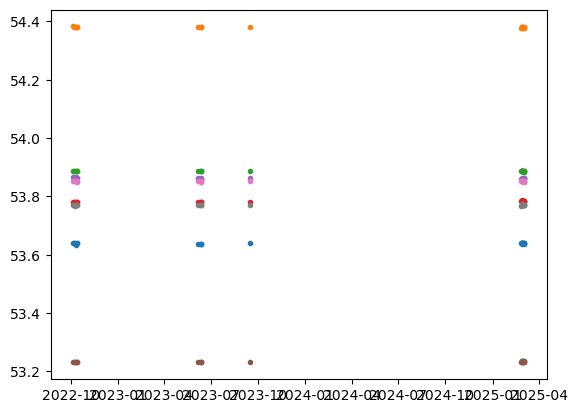

In [6]:
x = ar['timestamp'].to_numpy()
y = ar['biasVoltagesAvg'][:, 5, :]
plt.plot(x.astype('datetime64[s]'), y, '.');

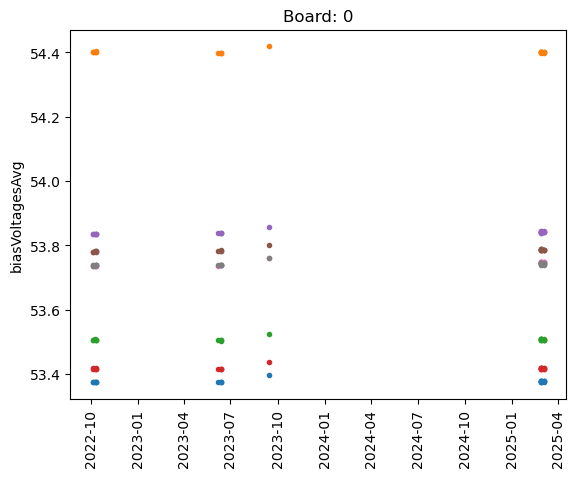

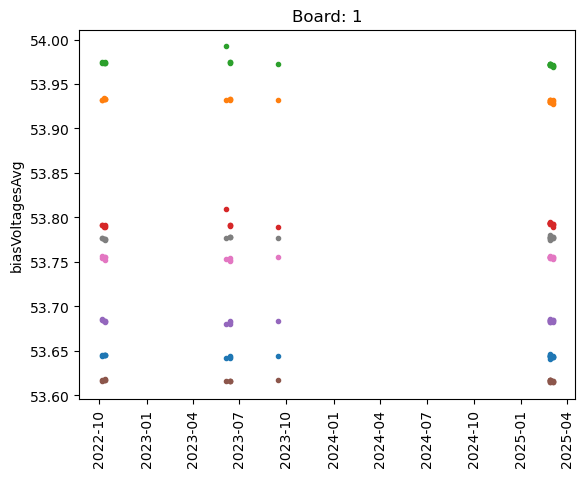

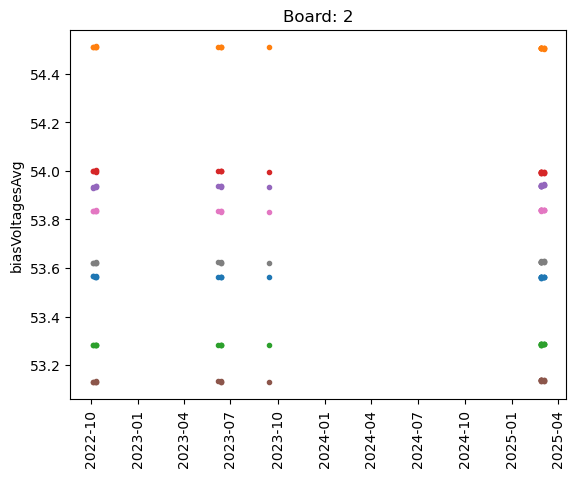

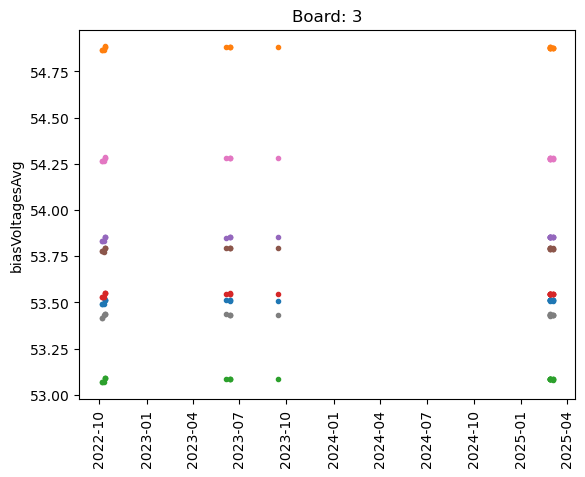

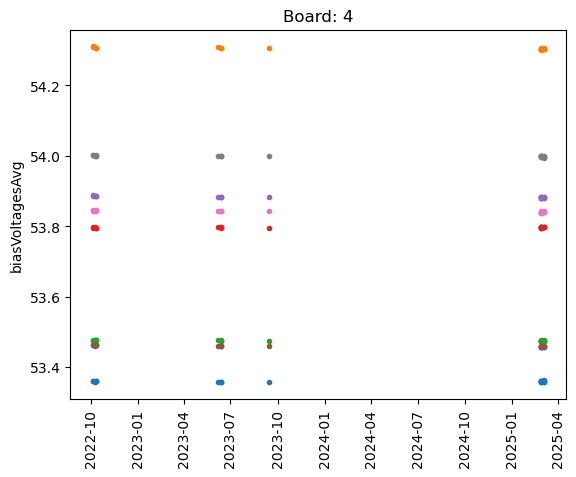

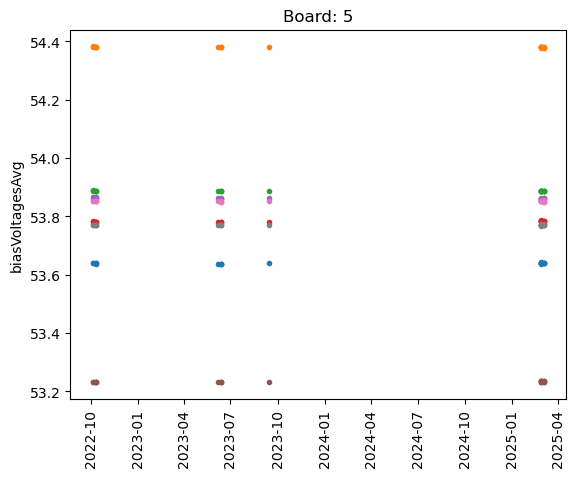

In [7]:
for board in range(6):
    plt.figure()
    x = ar['timestamp'].to_numpy()
    y = ar['biasVoltagesAvg'][:, board, :].to_numpy()
    
    plt.plot(x.astype('datetime64[s]'), y, '.')
    plt.xticks(rotation=90)
    # plt.ylim(10, 30)
    plt.ylabel('biasVoltagesAvg')
    plt.title("Board: %d" % board)

#    y=2*ar["meanTemperatures", cut][:,1,0].to_numpy()
#    plt.plot(x.astype('datetime64[s]'), y, 'bo', label='Temp [C]')


/tmp/ipykernel_949649/3034072054.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

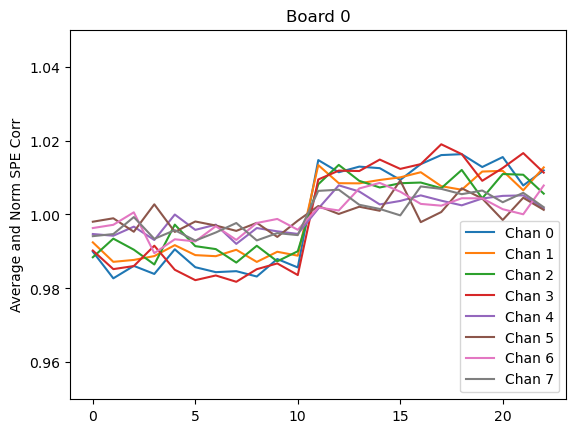

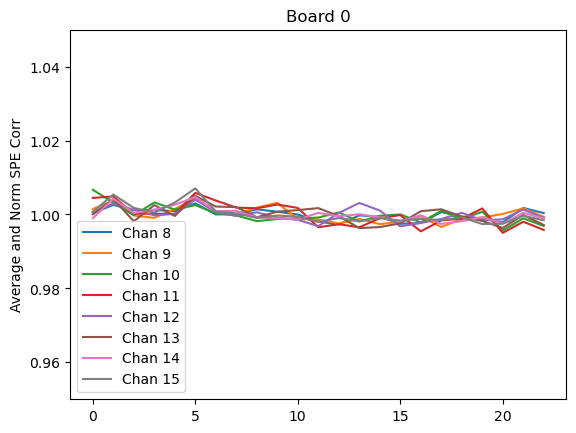

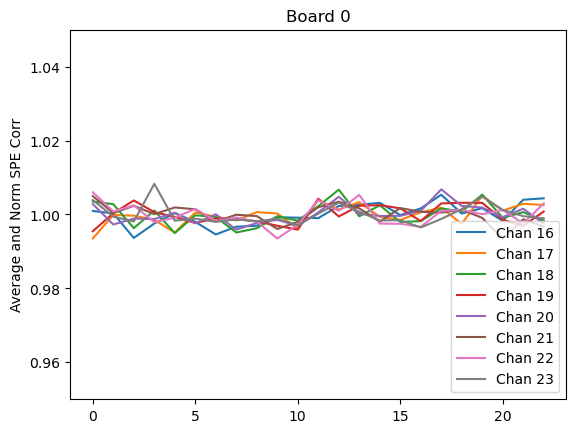

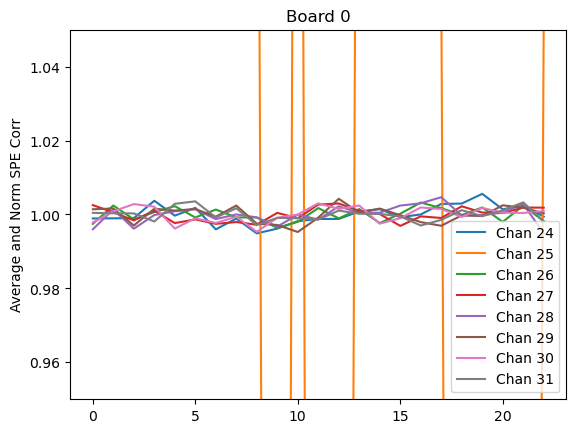

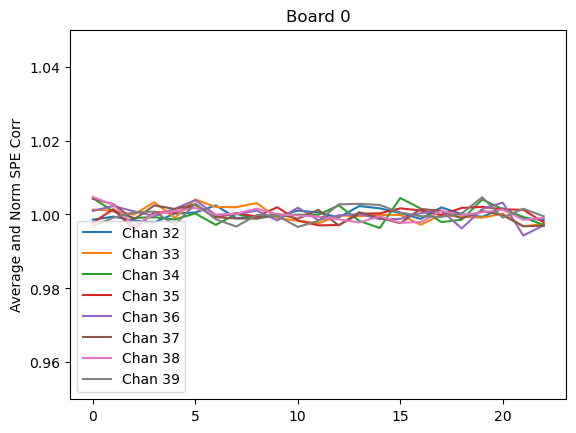

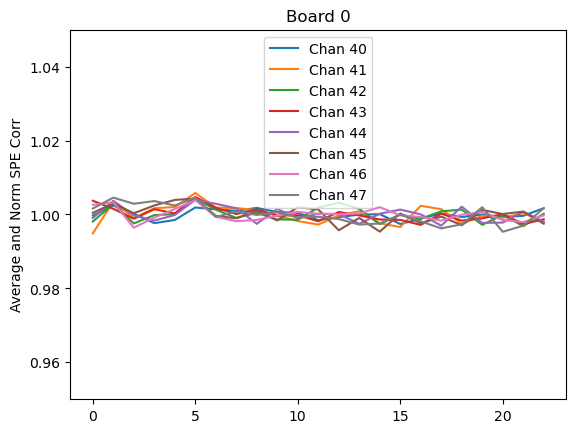

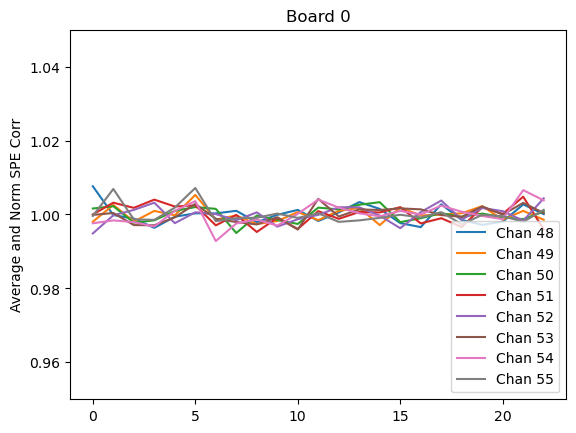

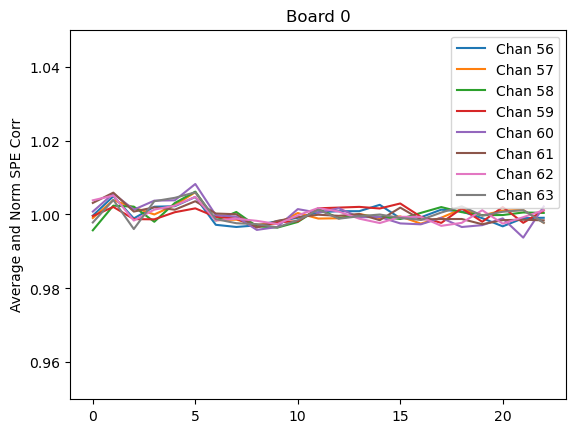

<Figure size 640x480 with 0 Axes>

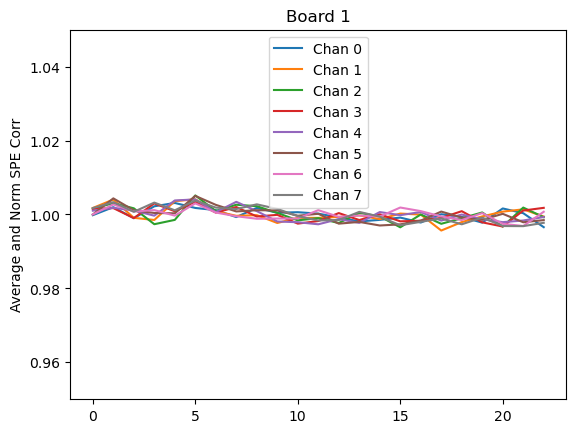

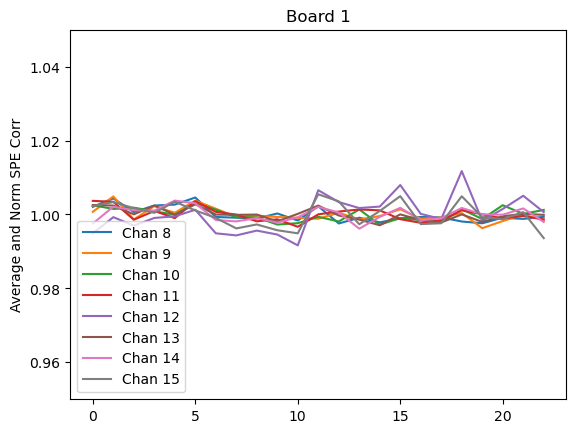

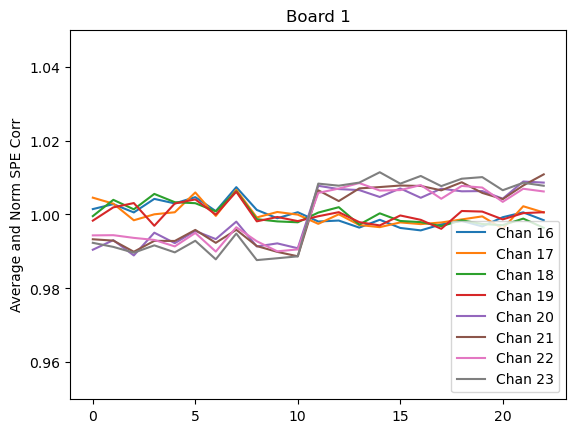

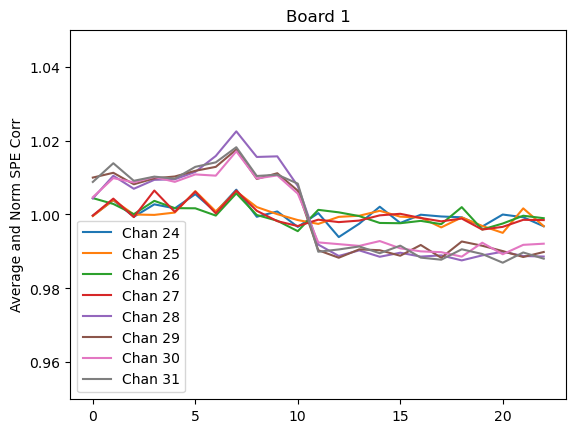

In [ ]:
for board in range(0,6):
    plt.figure()
    mean_vals = ak.mean(ar['calibConstantsTemperatureCorrected'][:, board, :], axis=0)
    result = ar['calibConstantsTemperatureCorrected'][:, board, :] / mean_vals
    for afe in range(0,8):
        plt.figure()
        for chan in range(0,8):
            plt.plot(result[:,afe*8+chan], "-", label="Chan %d"%(afe*8+chan));
            plt.ylim(0.95, 1.05)
            plt.title("Board %d"%board)
            plt.legend()
            plt.ylabel("Average and Norm SPE Corr");

/tmp/ipykernel_949649/2519589512.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

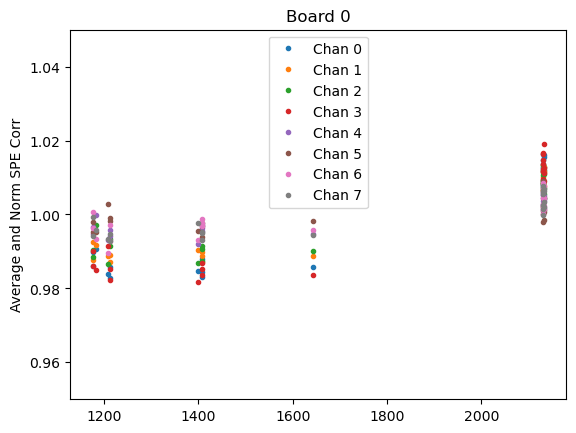

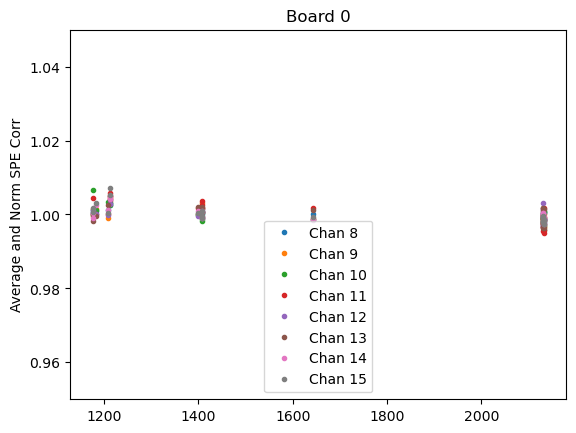

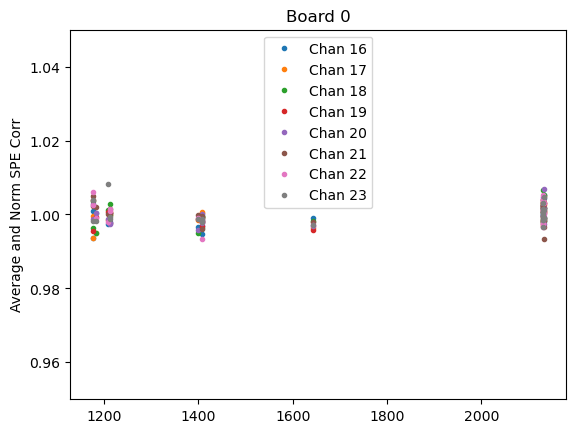

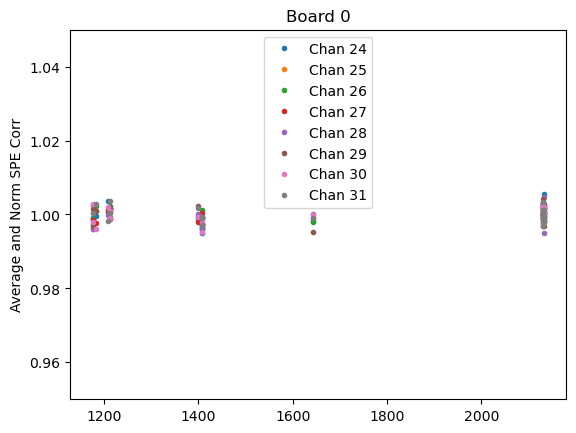

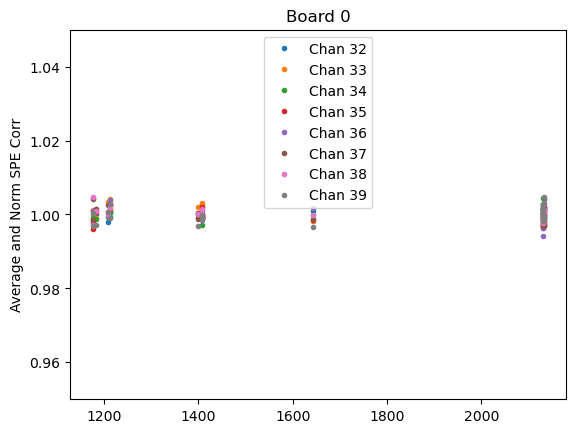

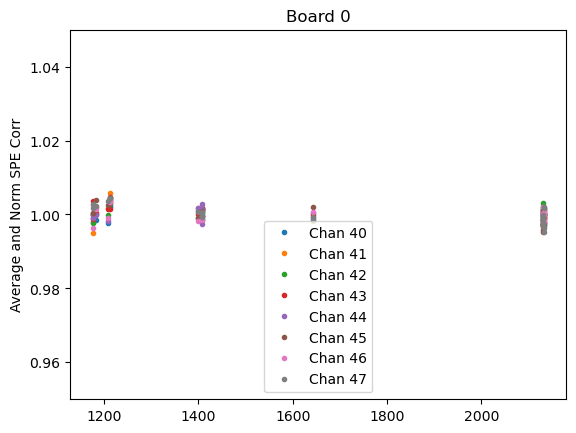

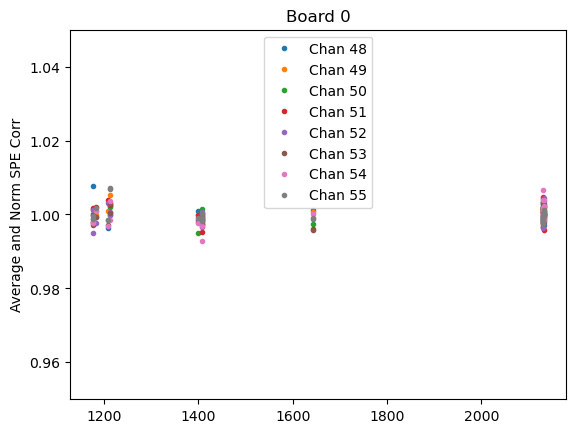

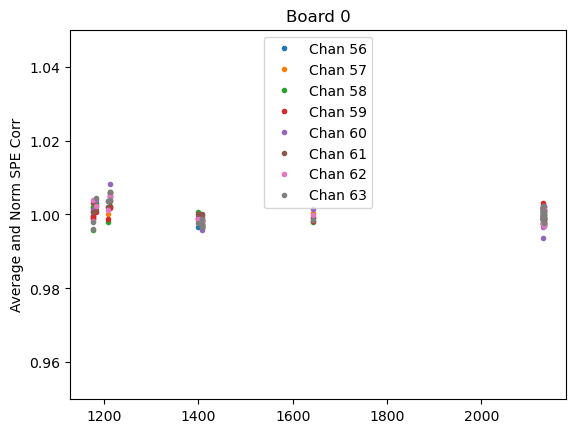

<Figure size 640x480 with 0 Axes>

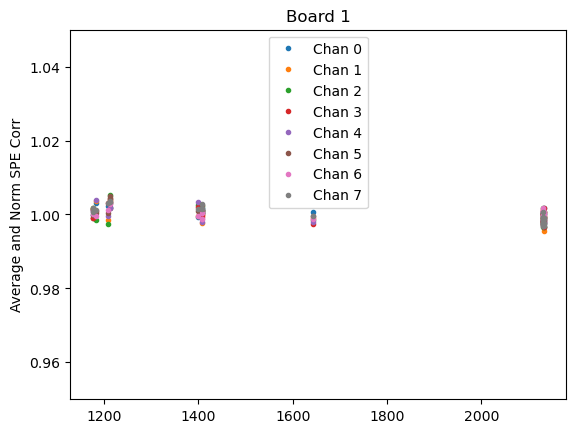

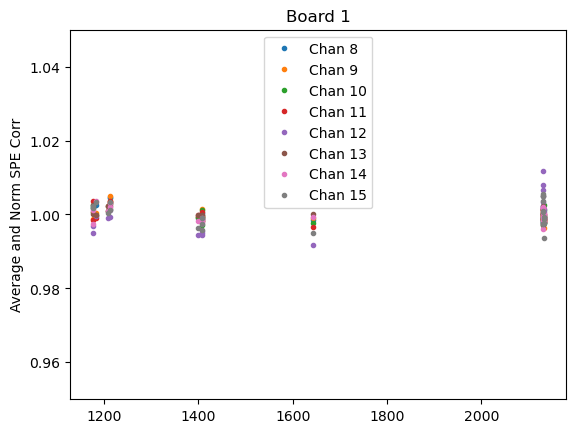

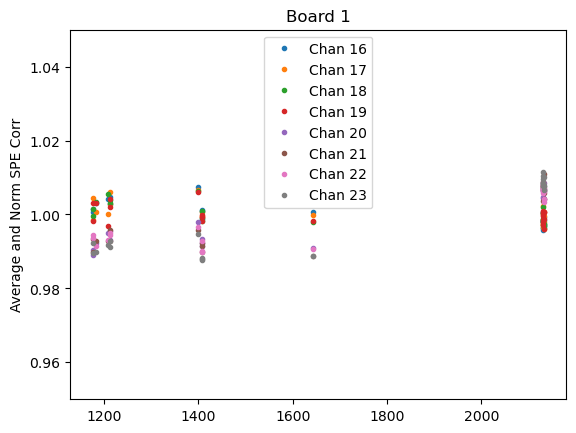

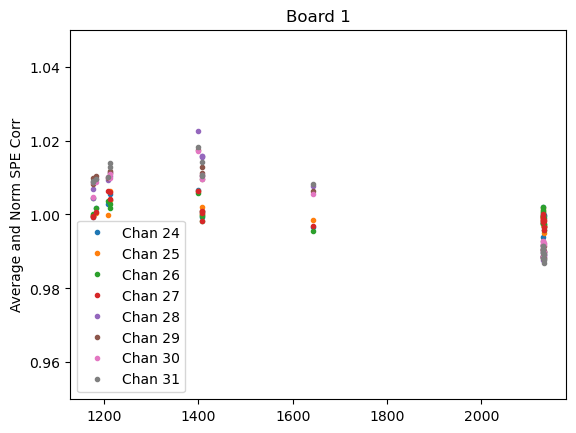

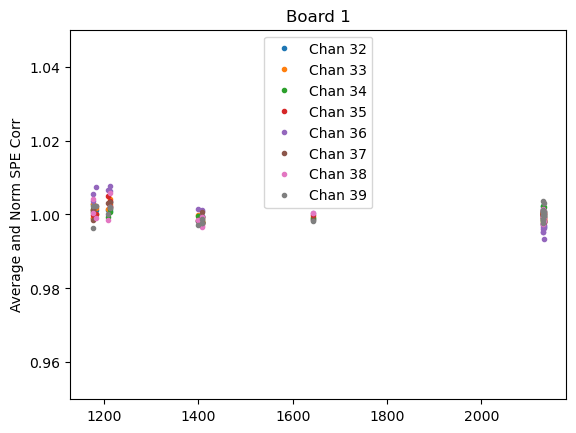

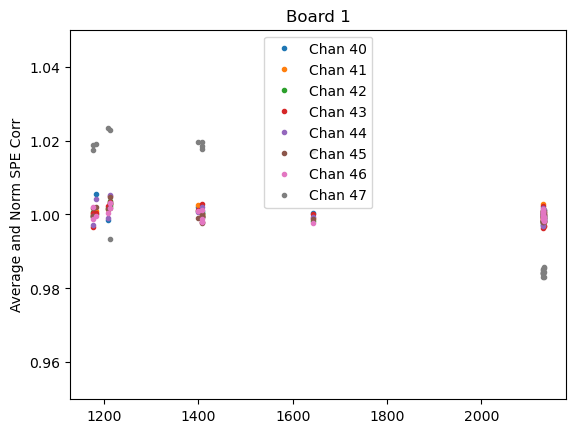

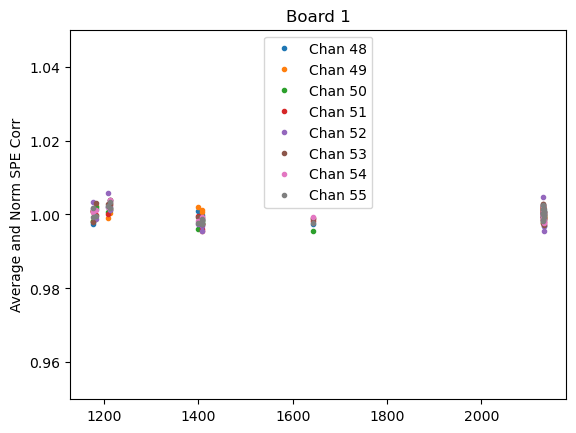

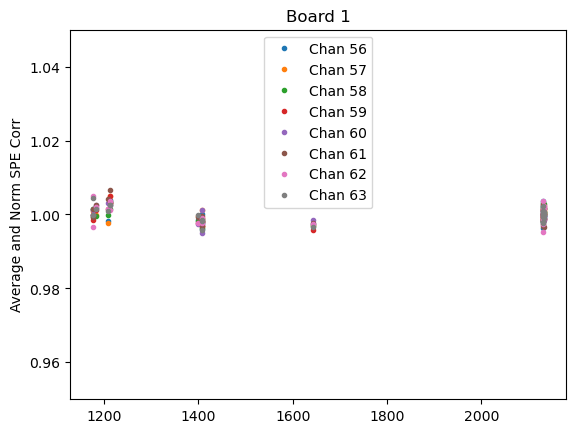

<Figure size 640x480 with 0 Axes>

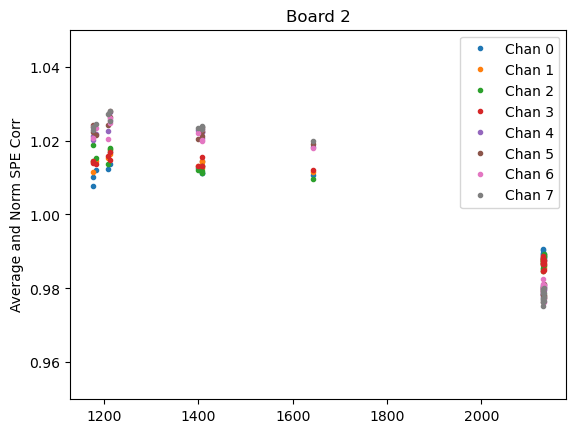

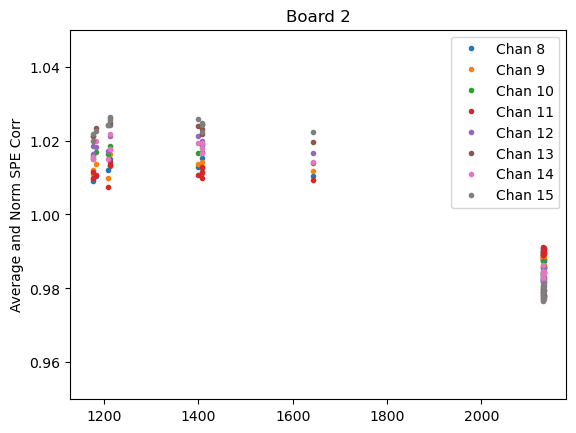

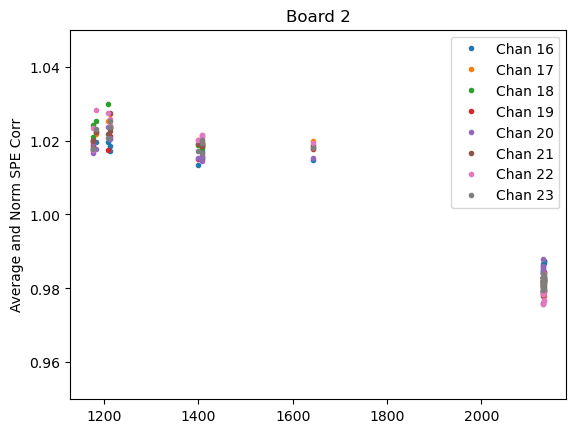

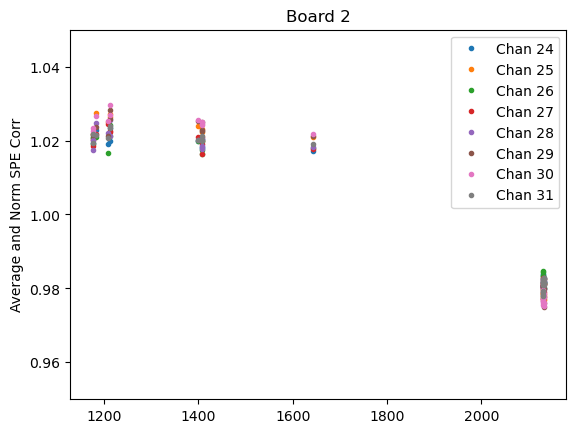

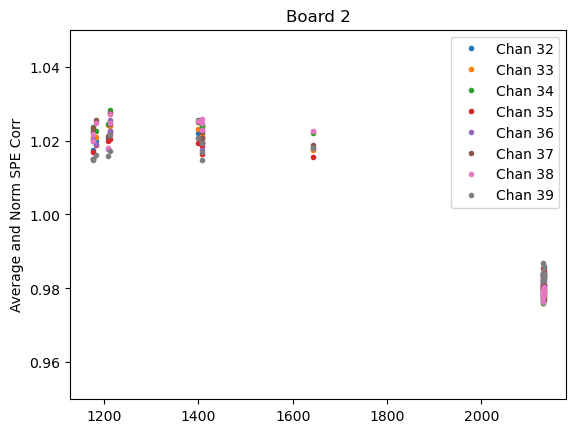

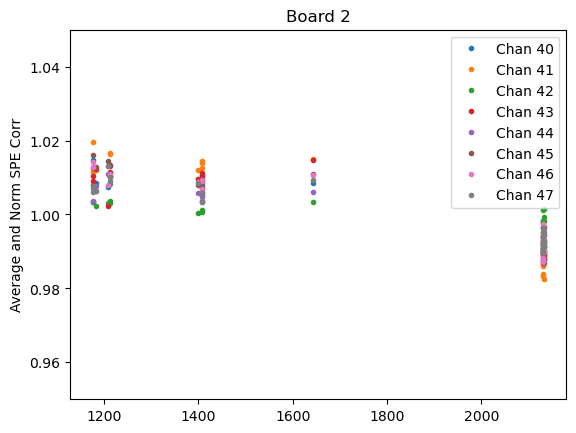

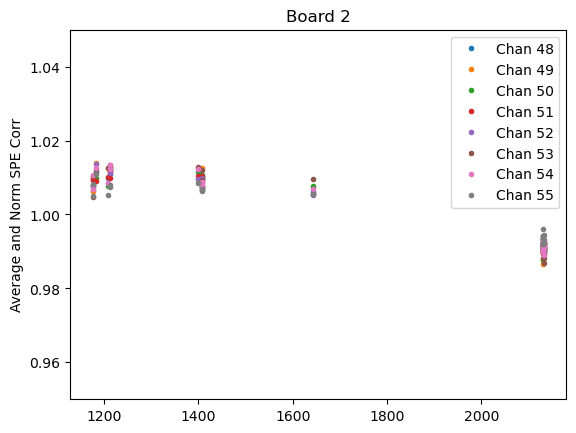

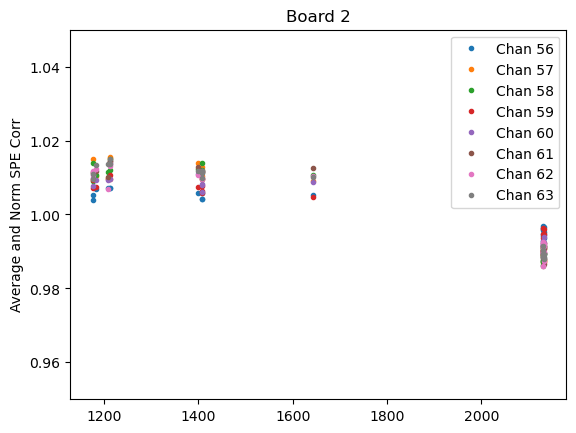

<Figure size 640x480 with 0 Axes>

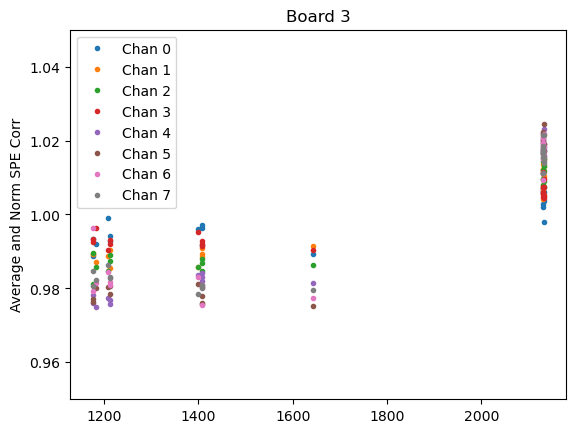

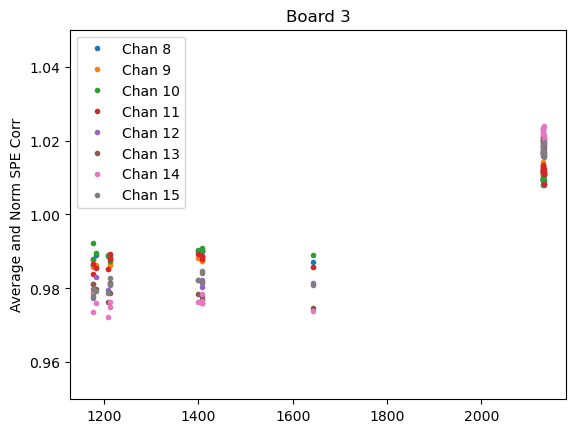

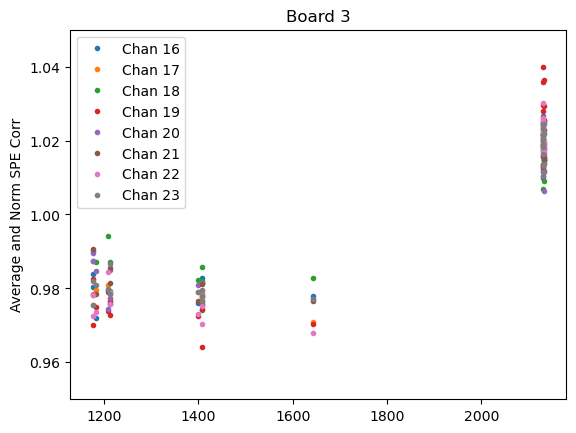

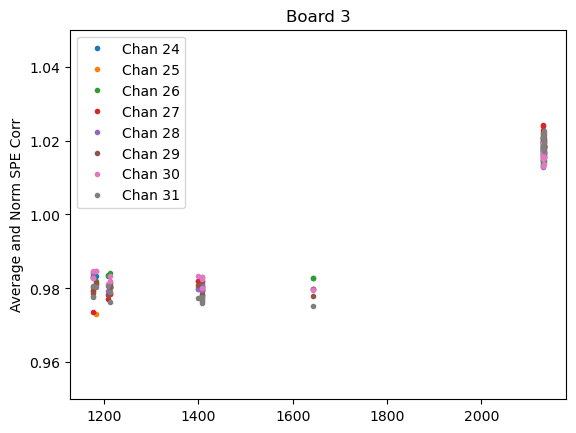

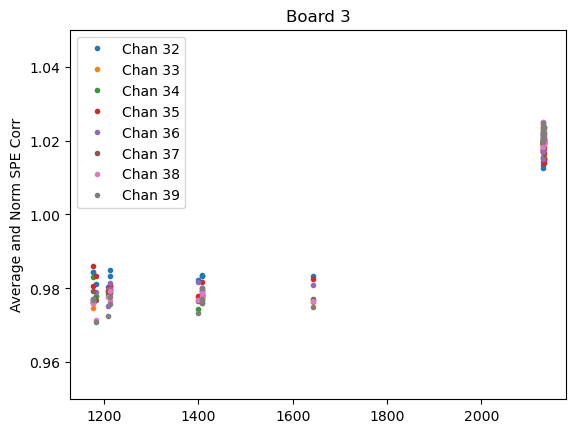

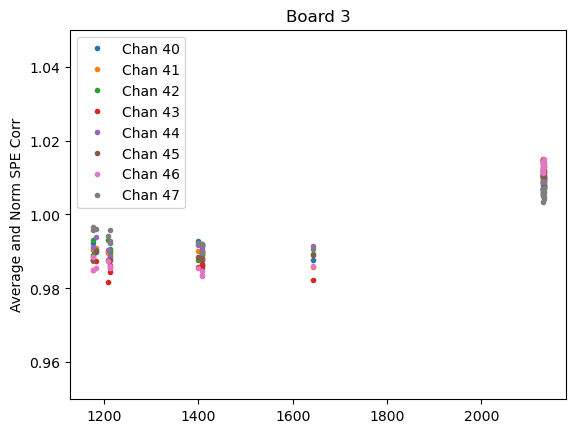

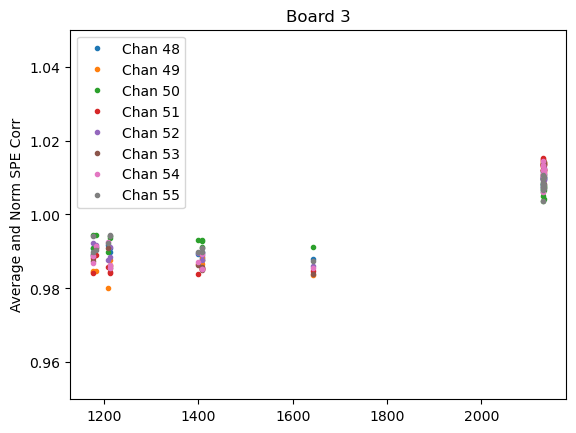

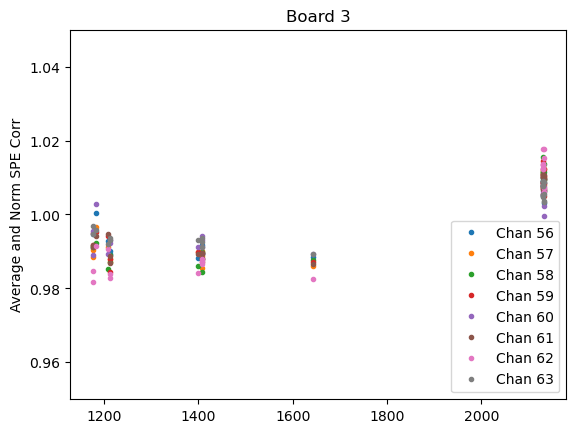

<Figure size 640x480 with 0 Axes>

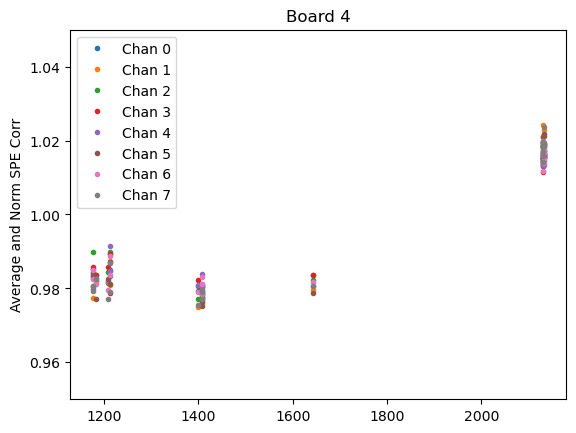

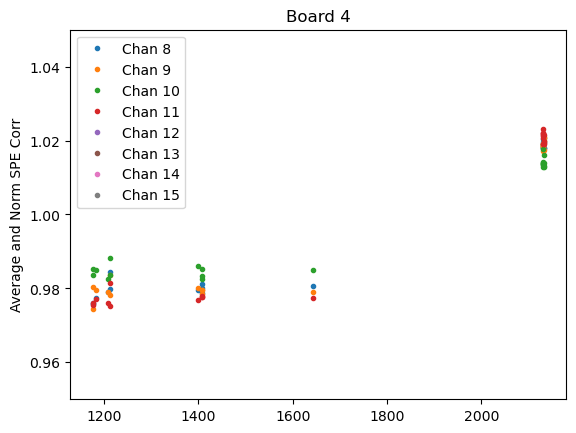

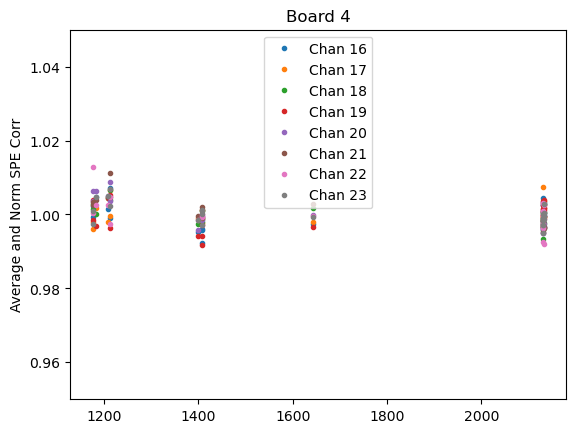

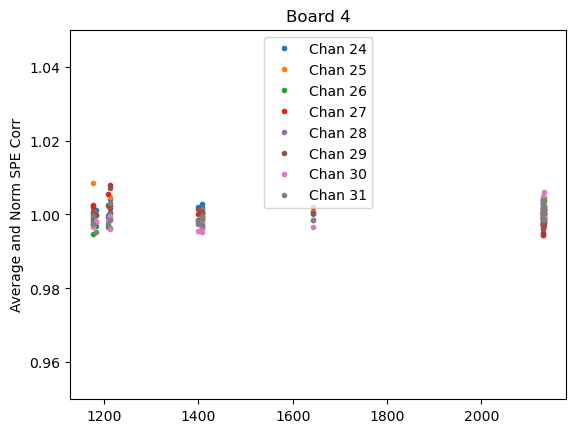

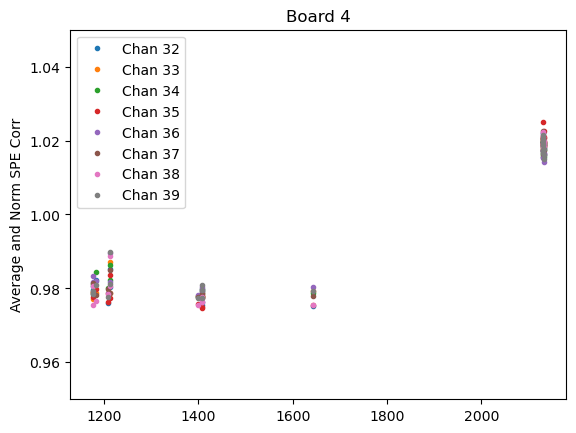

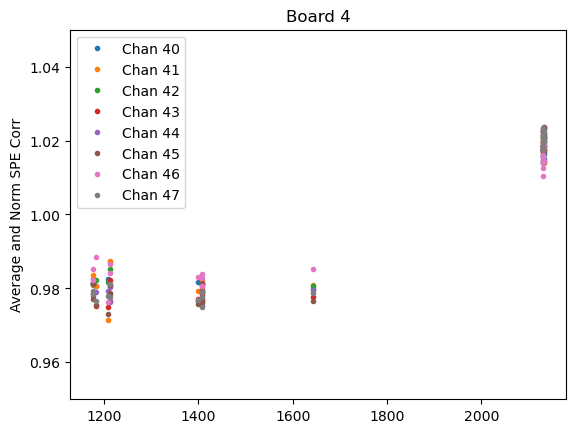

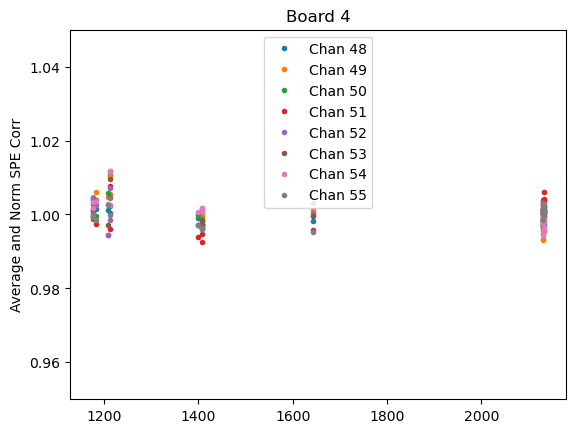

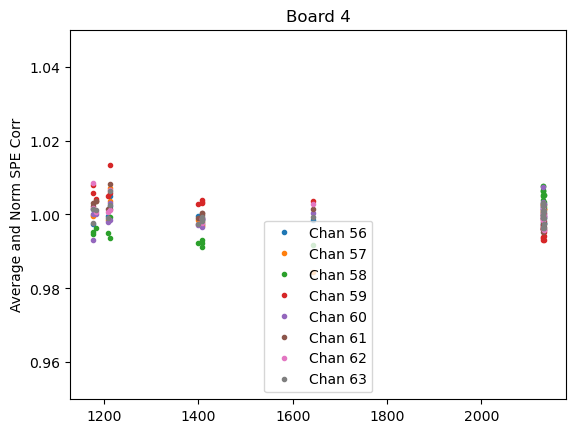

<Figure size 640x480 with 0 Axes>

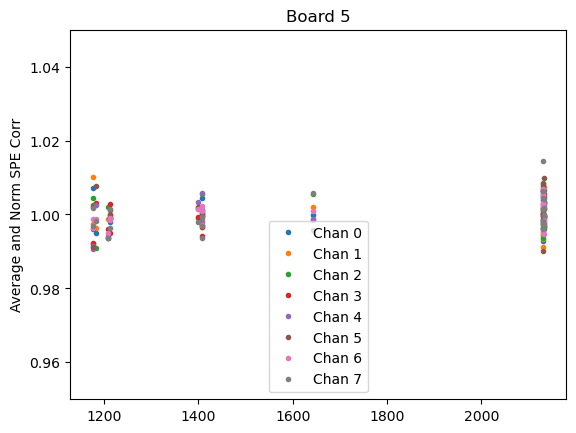

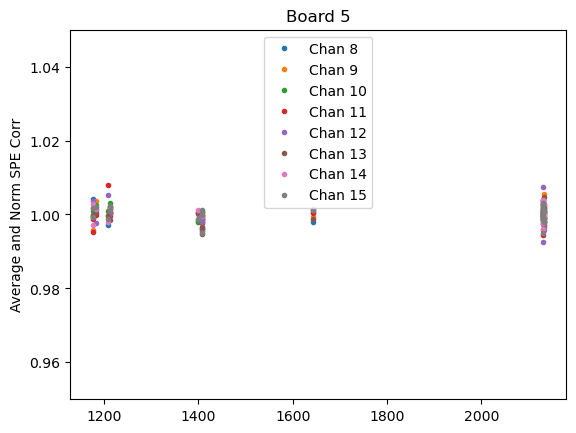

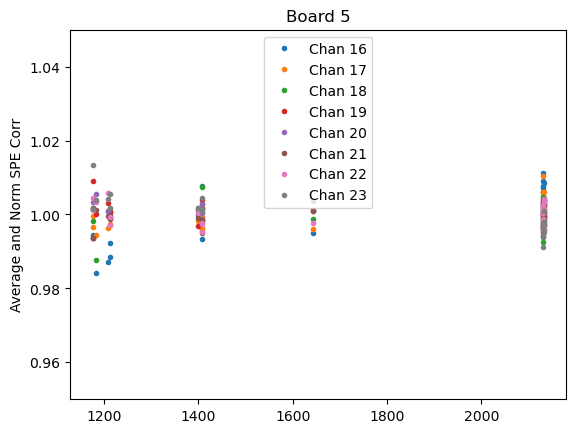

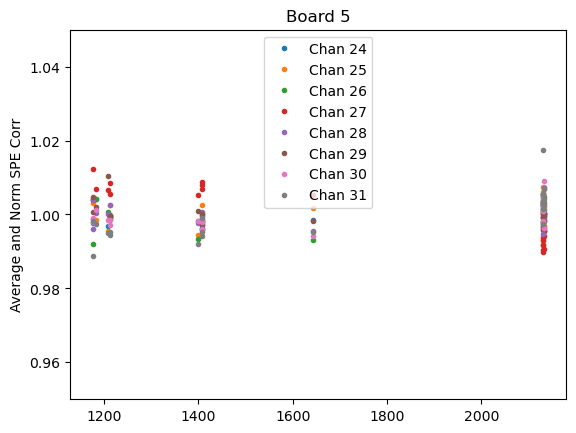

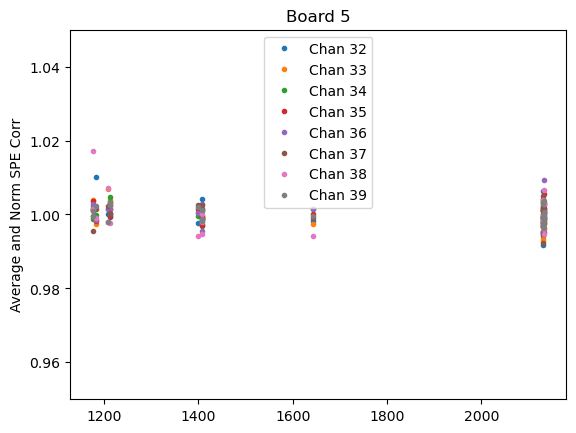

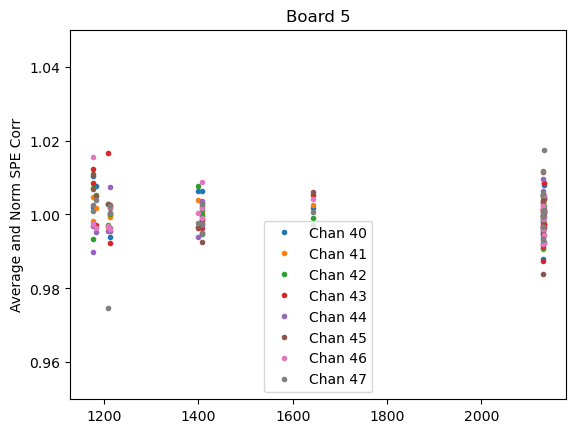

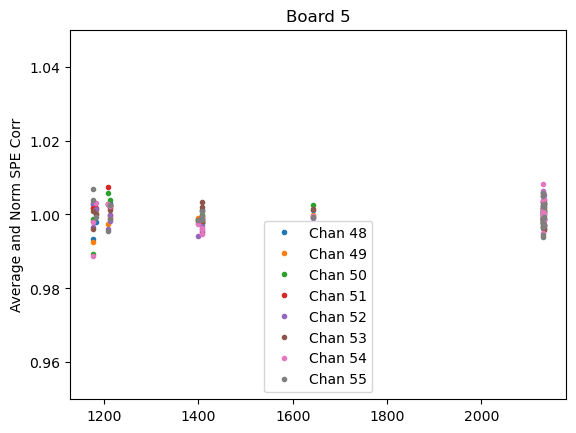

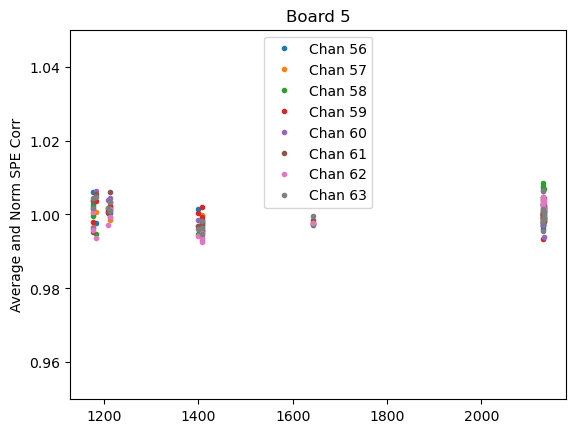

In [17]:
for board in range(0,6):
    plt.figure()
    mean_vals = ak.mean(ar['calibConstantsTemperatureCorrected'][:, board, :], axis=0)
    result = ar['calibConstantsTemperatureCorrected'][:, board, :] / mean_vals
    for afe in range(0,8):
        plt.figure()
        for chan in range(0,8):
            plt.plot(ar['runNumber'], result[:,afe*8+chan], ".", label="Chan %d"%(afe*8+chan));
            plt.ylim(0.95, 1.05)
            plt.title("Board %d"%board)
            plt.legend()
            plt.ylabel("Average and Norm SPE Corr");

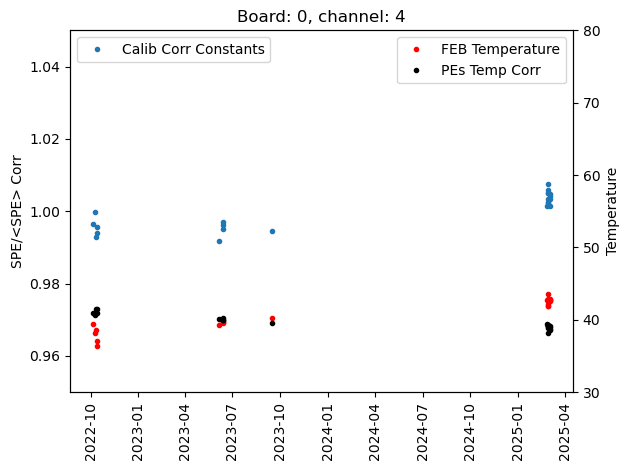

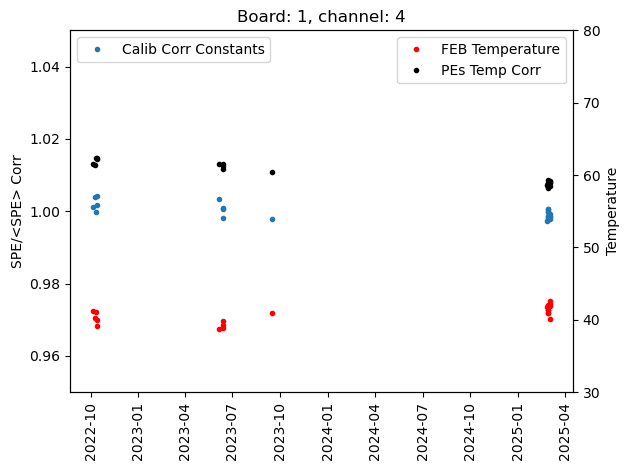

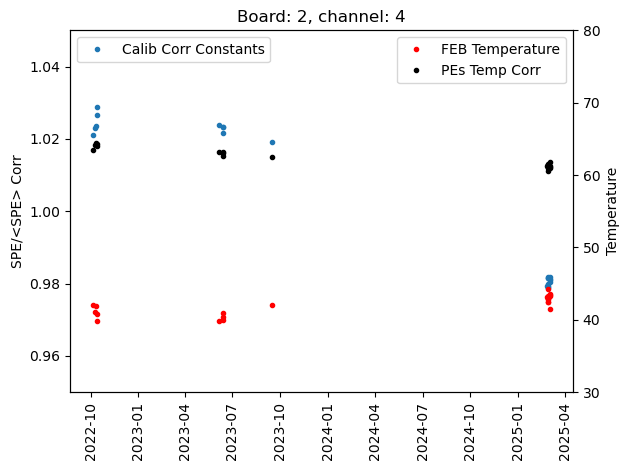

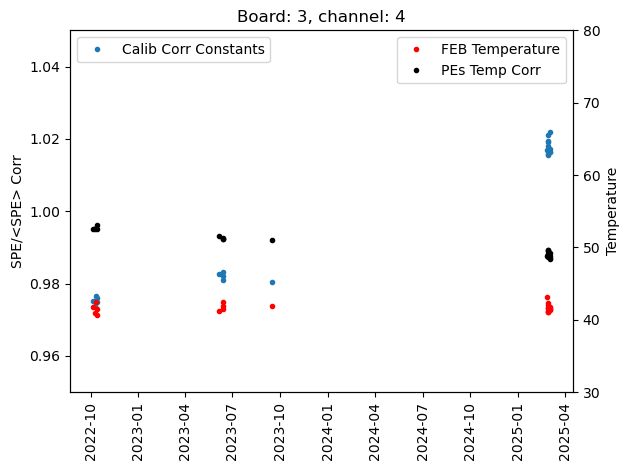

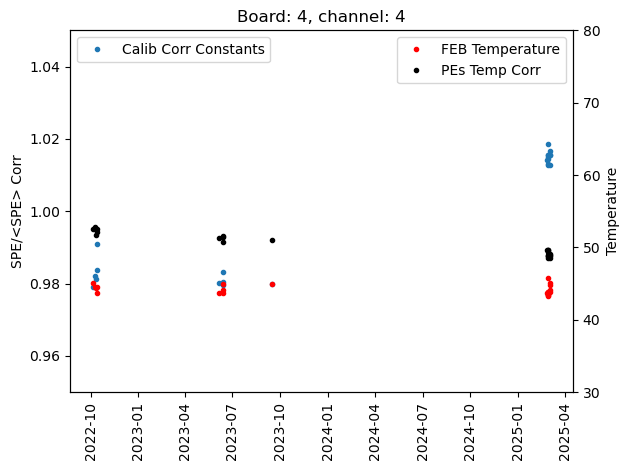

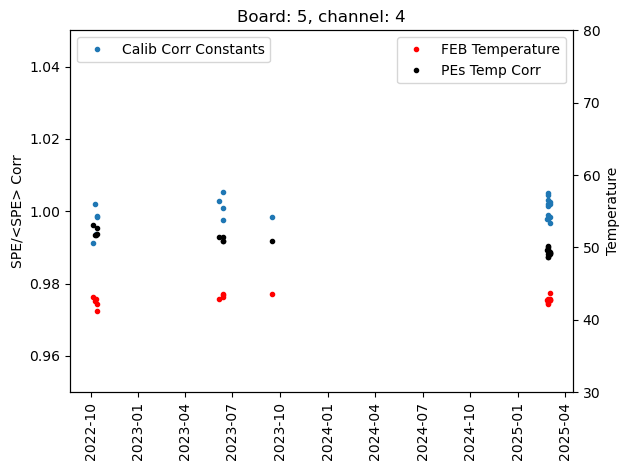

In [11]:
for board in range(0, 6):
    channel = 4
    fig, ax1 = plt.subplots()

    # Define your cut condition
#    cut = (ar['timestamp'] > 0) & (ar['runNumber'] < 1300)
    cut = (ar['timestamp'] > 0) & (ar['runNumber'] > 1176)
#    cut = (ar['timestamp'] > 0)
    x = ar['runNumber'][cut].to_numpy()
    x = ar['timestamp'][cut].to_numpy()
    
    # Primary axis data: SPE-related quantities
    y_temp_corr = ar['calibConstantsTemperatureCorrected'][cut][:, board, channel].to_numpy()
    y_temp_corr = y_temp_corr/y_temp_corr.mean()

    y_calib = ar['calibConstants'][cut][:, board, channel].to_numpy()

#    ax1.plot(x, y_temp_corr, '.', label='Calib Temp Corrected')
    ax1.plot(x.astype('datetime64[s]'), y_temp_corr, '.', label='Calib Corr Constants')

#    ax1.plot(x, y_calib, '.', label='Calib Constants')
#    ax1.plot(x.astype('datetime64[s]'), y_calib, '.', label='Calib Constants')
    ax1.set_ylabel('SPE/<SPE> Corr')
    ax1.set_ylim(0.95, 1.05)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_title("Board: %d, channel: %d" % (board, channel))
    ax1.legend(loc='upper left')

    # Secondary axis: FEB temperature data
    ax2 = ax1.twinx()
    # Adjust indexing to match your data structure; here assuming similar syntax
    y_temp = ar['febTemperaturesAvg'][cut][:, board].to_numpy()
#    ax2.plot(x, y_temp, '.', color='red', label='FEB Temperature')
    ax2.plot(x.astype('datetime64[s]'), y_temp, '.', color='red', label='FEB Temperature')

    y_pe_calib = ar['PEsTemperatureCorrected'][cut][:, board, channel].to_numpy()
    ax2.plot(x.astype('datetime64[s]'), y_pe_calib, '.', color='black', label='PEs Temp Corr')
    ax2.set_ylabel('Temperature')
    ax2.set_ylim(30, 80)
    ax2.legend()

    # Optional: combine legends if needed, or keep separate.
    fig.tight_layout()    

Temperature at CMB vs time

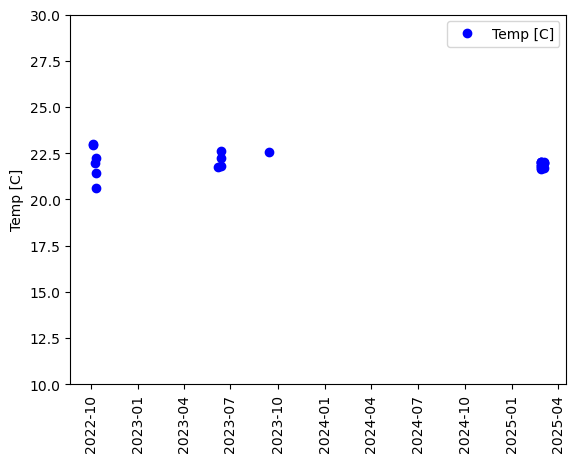

In [12]:
cut = (ar['timestamp'] > 0)
x=ar["timestamp", cut].to_numpy()
y=ar["meanTemperatures", cut][:,1,0].to_numpy()
    
plt.plot(x.astype('datetime64[s]'), y, 'bo', label='Temp [C]')
plt.xticks(rotation=90);
plt.ylim(10, 30)
plt.ylabel('Temp [C]')
plt.legend();

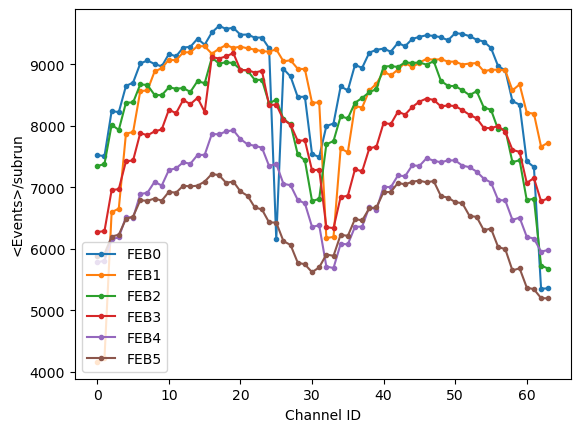

In [13]:
for feb in range(NFEBS):
    plt.plot(ak.mean(ar['signals'][:,feb,:], axis=0), '.-', label='FEB%d'%feb);
plt.ylabel('<Events>/subrun')
plt.xlabel('Channel ID')
plt.legend();

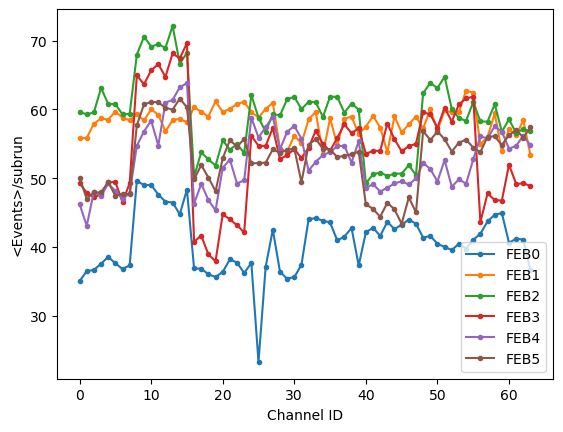

In [14]:
for feb in range(NFEBS):
    plt.plot(ak.mean(ar['PEs'][:,feb,:], axis=0), '.-', label='FEB%d'%feb);
plt.ylabel('<Events>/subrun')
plt.xlabel('Channel ID')
plt.legend();

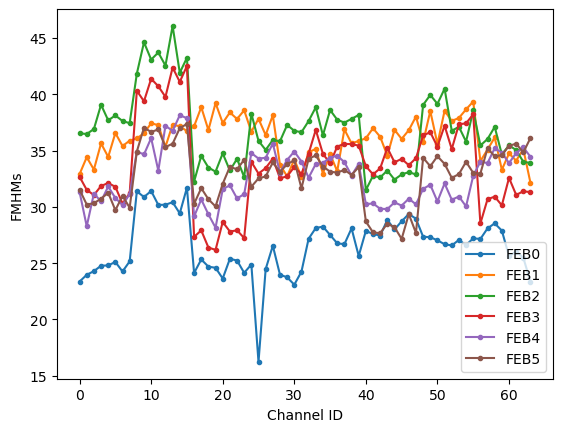

In [15]:
for feb in range(NFEBS):
    plt.plot(ak.mean(ar['FWHMs'][:,feb,:], axis=0), '.-', label='FEB%d'%feb);
plt.ylabel('FMHMs')
plt.xlabel('Channel ID')
plt.legend();